In [45]:
import glob
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import davies_bouldin_score
my_path = os.path.abspath('')
my_path = my_path.split('\\')
my_path_py = "\\".join(my_path[:-1])

In [46]:
df= pd.read_csv(my_path_py+"\\DatosRaw\\notificaciones_clima_7_dias_COMBINADO_SEMANAL.csv", sep=';')
poblacion= pd.read_csv(my_path_py+"\\DatosRaw\\Poblacion_Paraguay.csv", sep=',')
clustersFB = pd.read_csv(my_path_py+"\\2_FeatureBased\\ClusterFB1_2009al2013.csv", sep=',')
clustersFB = clustersFB.drop('Unnamed: 0', axis=1)
clustersFBP2 = pd.read_csv(my_path_py+"\\2_FeatureBased\\ClusterFB1_2012-2013.csv", sep=',')
clustersFBP2 = clustersFBP2.drop('Unnamed: 0', axis=1)
poblacion['#'] = poblacion['#'].str.upper()
poblacion = poblacion.head(268)
poblacion.rename(columns = {'#':'Ciudad'}, inplace = True)

In [47]:
S1 = set(list(dict.fromkeys(df['distrito_notif'].tolist())))
S2 = set(list(dict.fromkeys(poblacion['Ciudad'].tolist())))
ciudades = S1.intersection(S2)

df=df[['anio','distrito_notif', 'semana', 'casos']].copy()
df = df.rename(columns={'anio':'Año','distrito_notif':'Distrito'})
df = df[df['Distrito'].isin(ciudades)]

In [48]:
listaDistrito = df['Distrito'].tolist()
listaDistrito = list(dict.fromkeys(listaDistrito))
print('Son ', len(listaDistrito), ' distritos')
listaDistrito.sort()

Son  200  distritos


In [49]:
pob = []
for year in list(range(2009,2014)):
    aux = df[df['Año'] == year]
    for dis in aux.Distrito.values:
        pob.append(int(poblacion[poblacion.Ciudad == dis][str(year)].values[0]))   

df['Poblacion'] = pob
df['incidencia'] = (df.casos/df.Poblacion)*100000
df['semana'] = df['semana'] + df['Año'].apply(lambda x: (x-2009)*52 if x>2009 else 0)
df = df.reset_index(drop=True)

In [50]:
lista_maxin = []
for d in listaDistrito:
    aux = df[['Distrito', 'incidencia', 'Año']]
    aux = aux[aux['Distrito']== d ]
    #print(sum(aux.incidencia.values))
    lista_maxin.append(sum(aux.incidencia.values)/5)

df_p = pd.DataFrame()
df_p['Distrito'] = listaDistrito
df_p['Incidencia Media Acumulada'] = lista_maxin

In [51]:
limits = np.percentile(df_p['Incidencia Media Acumulada'], [0, 33, 66, 100])

In [52]:
limits[2]

103.26750953369205

# INCIDENCIA BAJA

In [95]:
incidencia_baja = df_p[df_p['Incidencia Media Acumulada'] <= limits[1]]
incidencia_baja_lista = incidencia_baja['Distrito'].tolist()
for d in incidencia_baja_lista:
    aux = df[df['Distrito']== d]
    if (len(aux['incidencia'].values)>10):
        print(d+" " + str(len(aux['incidencia'].values)))

EDELIRA 11
JUAN E. OLEARY 17
LOMA PLATA 11
RAUL ARSENIO OVIEDO 14
SAN JUAN NEPOMUCENO 20
SAN PEDRO DEL PARANA 12
SANTA RITA 17
YHU 13
YUTY 12


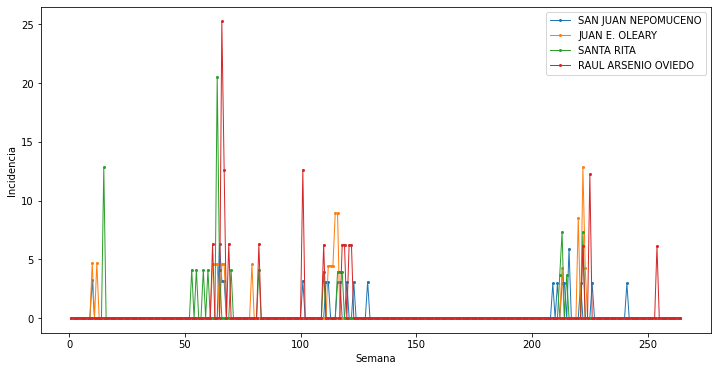

In [96]:
semanas_df = pd.DataFrame()
semanas_df['semana'] = list(range(1,265)) 

plt.figure(figsize=(12, 6))

muestras_baja = ['SAN JUAN NEPOMUCENO', 'JUAN E. OLEARY', 'SANTA RITA', 'RAUL ARSENIO OVIEDO']
for d in muestras_baja:
    aux = df[df['Distrito']== d]
    aux = pd.merge(semanas_df, aux, how="left", on=['semana'])
    aux['incidencia'] = aux['incidencia'].replace(np.nan, 0)
    y = aux['semana'].values
    x = aux['incidencia'].values
    plt.plot(y, x, label = d, lw=1, marker='o', ms=2)
plt.legend()
plt.xlabel('Semana')
plt.ylabel('Incidencia')
plt.savefig('Incidencia_baja.png')
plt.show()


In [97]:
for d in muestras_baja:
    print(d)
    print(clustersFB[clustersFB['Distrito']==d]['Cluster KM'].values)


SAN JUAN NEPOMUCENO
[1]
JUAN E. OLEARY
[1]
SANTA RITA
[1]
RAUL ARSENIO OVIEDO
[1]


# INCIDENCIA MEDIA

In [93]:
incidencia_media = df_p[(df_p['Incidencia Media Acumulada'] > limits[1]) & (df_p['Incidencia Media Acumulada'] <= limits[2])]
incidencia_media_lista = incidencia_media['Distrito'].tolist()
for d in incidencia_media_lista:
    aux = df[df['Distrito']== d]
    if (len(aux['incidencia'].values)>30):
        print(d+" " + str(len(aux['incidencia'].values)))

ACAHAY 32
CAAZAPA 37
CAMBYRETA 40
ENCARNACION 94
ITAKYRY 37
JUAN EULOGIO ESTIGARRIBIA 31
MINGA GUAZU 83
PILAR 57
SAN PEDRO 37


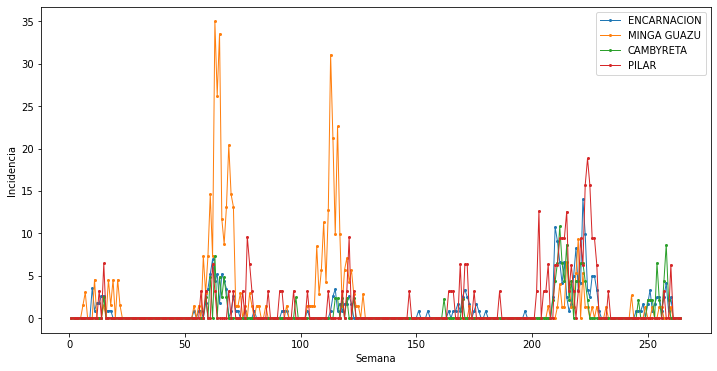

In [98]:
plt.figure(figsize=(12, 6))

muestras_media = ['ENCARNACION', 'MINGA GUAZU', 'CAMBYRETA', 'PILAR']
for d in muestras_media:
    aux = df[df['Distrito']== d]
    aux = pd.merge(semanas_df, aux, how="left", on=['semana'])
    aux['incidencia'] = aux['incidencia'].replace(np.nan, 0)
    y = aux['semana'].values
    x = aux['incidencia'].values
    plt.plot(y, x, label = d, lw=1, marker='o', ms=2)
plt.legend()
plt.xlabel('Semana')
plt.ylabel('Incidencia')
plt.savefig('Incidencia_media.png')
plt.show()


In [58]:
for d in muestras_media:
    print(d)
    print(clustersFB[clustersFB['Distrito']==d]['Cluster KM'].values)


CORONEL OVIEDO
[1]
MINGA GUAZU
[1]
SAN BERNARDINO
[1]
EMBOSCADA
[1]


# INCIDENCIA ALTA

In [59]:
incidencia_alta = df_p[df_p['Incidencia Media Acumulada'] > limits[2]]
incidencia_alta_lista = incidencia_alta['Distrito'].tolist()

In [87]:
for d in incidencia_alta_lista:
    aux = df[df['Distrito']== d]
    if (len(aux['incidencia'].values)>100):
        print(d+" " + str(len(aux['incidencia'].values)))
    

AREGUA 120
CAACUPE 128
CAAGUAZU 111
CAPIATA 172
CONCEPCION 151
CORONEL OVIEDO 122
FERNANDO DE LA MORA 173
HERNANDARIAS 105
HORQUETA 129
ITA 123
ITAUGUA 140
J A SALDIVAR 125
LAMBARE 194
LIMPIO 166
LUQUE 176
MARIANO ROQUE ALONSO 177
PEDRO JUAN CABALLERO 163
SAN ANTONIO 139
SAN LORENZO 178
VILLA ELISA 153
VILLA HAYES 122
YPACARAI 101
YPANE 138


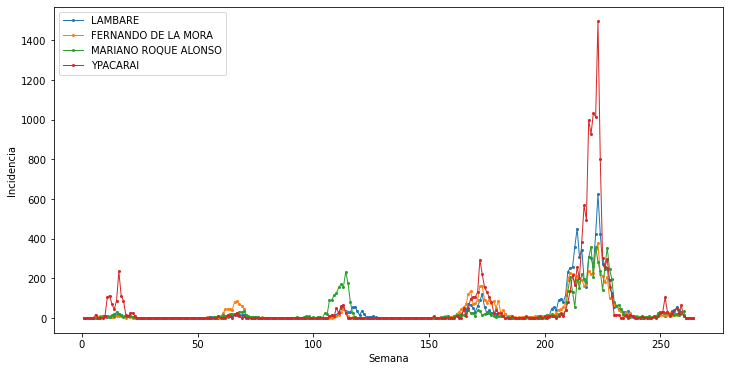

In [99]:
plt.figure(figsize=(12, 6))
muestras_alta = ['LAMBARE', 'FERNANDO DE LA MORA', 'MARIANO ROQUE ALONSO', 'YPACARAI']
for d in muestras_alta:
    aux = df[df['Distrito']== d]
    aux = pd.merge(semanas_df, aux, how="left", on=['semana'])
    aux['incidencia'] = aux['incidencia'].replace(np.nan, 0)
    y = aux['semana'].values
    x = aux['incidencia'].values
    plt.plot(y, x, label = d, lw=1, marker='o', ms=2)
plt.legend()
plt.xlabel('Semana')
plt.ylabel('Incidencia')
plt.savefig('Incidencia_alta.png')
plt.show()


In [61]:
clusters_muestras_altas = []
for d in muestras_alta:
    print(d)
    clusters_muestras_altas.append(clustersFB[clustersFB['Distrito']==d]['Cluster KM'].values)

LAMBARE
FERNANDO DE LA MORA
MARIANO ROQUE ALONSO
YPACARAI


# INCIDENCIA UNA MUESTRA POR CLUSTER 09-13 COMPLETO

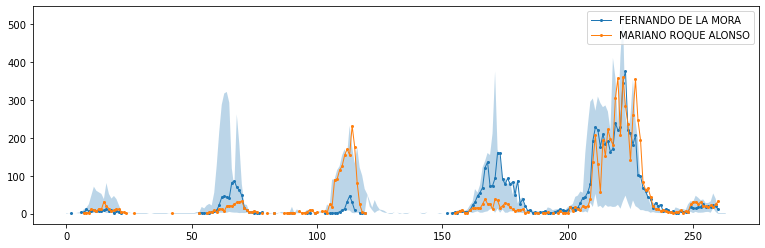

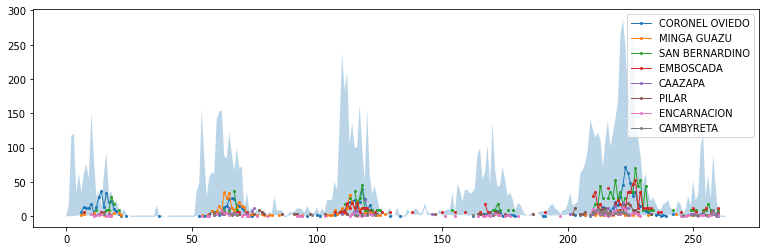

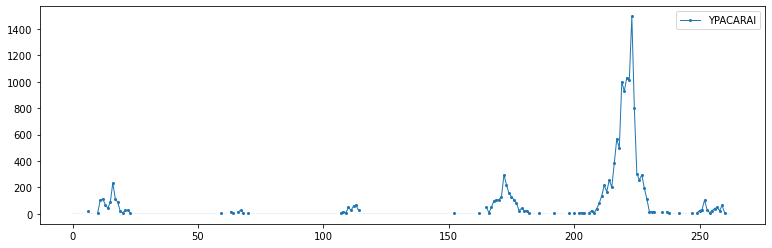

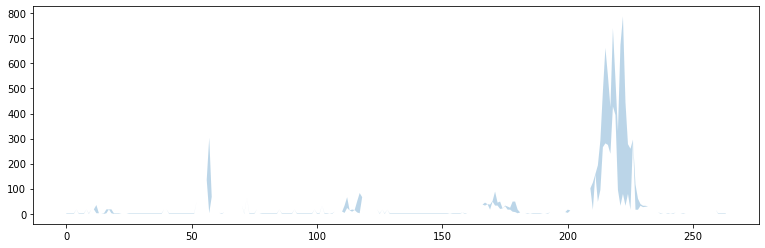

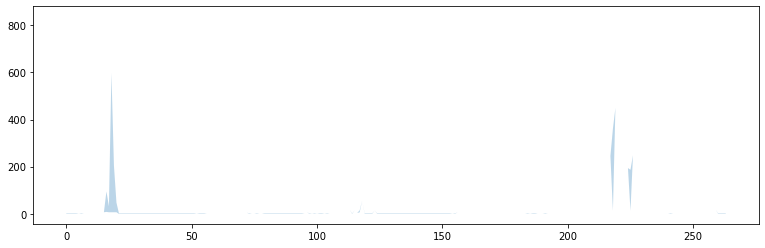

In [62]:
for i in list(range(5)):
    aux = clustersFB[clustersFB['Cluster KM']== i].Distrito.values
    aux2 = df[df['Distrito'].isin(aux.tolist())]
    minimo= []
    maximo = []
    for j in list(range(1,265)):
        aux3 = aux2[aux2['semana']==j].incidencia.values
        if (len(aux3)>0):
            minimo.append(min(aux3))
            maximo.append(max(aux3))
        else:
            minimo.append(-1)
            maximo.append(1)
    fig, ax = plt.subplots(figsize=(13, 4))
    #ax.plot(list(range(len(minimo))), minimo,'-')
    #ax.plot(list(range(len(maximo))), maximo,'-')
    ax.fill_between(list(range(len(minimo))), minimo, maximo, alpha=0.3)
    for d in muestras_alta:
        if (clustersFB[clustersFB['Distrito']== d]['Cluster KM'].values[0] == i):
            aux = df[df['Distrito']== d]
            aux = pd.merge(semanas_df, aux, how="left", on=['semana'])
            #aux['incidencia'] = aux['incidencia'].replace(np.nan, 0)
            y = aux['semana'].values
            x = aux['incidencia'].values
            ax.plot(y, x, label = d, lw=1, marker='o', ms=2)
            ax.legend()
            
    for d in muestras_media:
        if (clustersFB[clustersFB['Distrito']== d]['Cluster KM'].values[0] == i):
            aux = df[df['Distrito']== d]
            aux = pd.merge(semanas_df, aux, how="left", on=['semana'])
            #aux['incidencia'] = aux['incidencia'].replace(np.nan, 0)
            y = aux['semana'].values
            x = aux['incidencia'].values
            ax.plot(y, x, label = d, lw=1, marker='o', ms=2)
            ax.legend()
            
    for d in muestras_baja:
        if (clustersFB[clustersFB['Distrito']== d]['Cluster KM'].values[0] == i):
            aux = df[df['Distrito']== d]
            aux = pd.merge(semanas_df, aux, how="left", on=['semana'])
            #aux['incidencia'] = aux['incidencia'].replace(np.nan, 0)
            y = aux['semana'].values
            x = aux['incidencia'].values
            ax.plot(y, x, label = d, lw=1, marker='o', ms=2)
            ax.legend()
plt.show()

In [66]:
fechas = pd.date_range(start='1/1/2009', end='1/1/2014', freq='W')
fechas = fechas.strftime('%Y-%m-%d')
print("La longitud de la serie es: ", len(fechas))
print(fechas)

La longitud de la serie es:  261
Index(['2009-01-04', '2009-01-11', '2009-01-18', '2009-01-25', '2009-02-01',
       '2009-02-08', '2009-02-15', '2009-02-22', '2009-03-01', '2009-03-08',
       ...
       '2013-10-27', '2013-11-03', '2013-11-10', '2013-11-17', '2013-11-24',
       '2013-12-01', '2013-12-08', '2013-12-15', '2013-12-22', '2013-12-29'],
      dtype='object', length=261)


In [67]:
df['DateStamp'] = df['semana'].apply(lambda x: fechas[x])
df

,Año,Distrito,semana,casos,Poblacion,incidencia,DateStamp
0,2009,ASUNCION,2,2,531388,0.376373,2009-01-18
1,2009,FERNANDO DE LA MORA,2,1,143116,0.698734,2009-01-18
2,2009,PEDRO JUAN CABALLERO,2,2,103243,1.937177,2009-01-18
3,2009,YBY YAU,2,4,25630,15.606711,2009-01-18
4,2009,YPANE,2,1,36547,2.736203,2009-01-18
...,...,...,...,...,...,...,...
7271,2013,VILLA HAYES,260,6,46033,13.034128,2013-12-29
7272,2013,VILLETA,260,3,33890,8.852169,2013-12-29
7273,2013,YAGUARON,260,1,30369,3.292832,2013-12-29
7274,2013,YPACARAI,260,2,25002,7.999360,2013-12-29


In [68]:
aux = clustersFB[clustersFB['Cluster KM']== 2].Distrito.values
aux2 = df[df['Distrito'].isin(aux.tolist())]


,Año,Distrito,semana,casos,Poblacion,incidencia,DateStamp
49,2009,YPACARAI,6,4,23011,17.382991,2009-02-15
161,2009,YPACARAI,10,2,23011,8.691495,2009-03-15
195,2009,YPACARAI,11,24,23011,104.297944,2009-03-22
231,2009,YPACARAI,12,26,23011,112.989440,2009-03-29
275,2009,YPACARAI,13,16,23011,69.531963,2009-04-05
...,...,...,...,...,...,...,...
7118,2013,YPACARAI,256,10,25002,39.996800,2013-12-01
7160,2013,YPACARAI,257,12,25002,47.996160,2013-12-08
7192,2013,YPACARAI,258,6,25002,23.998080,2013-12-15
7229,2013,YPACARAI,259,16,25002,63.994880,2013-12-22


In [75]:
len(minimo)

260

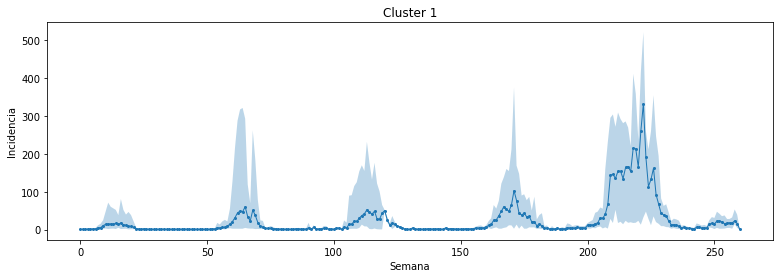

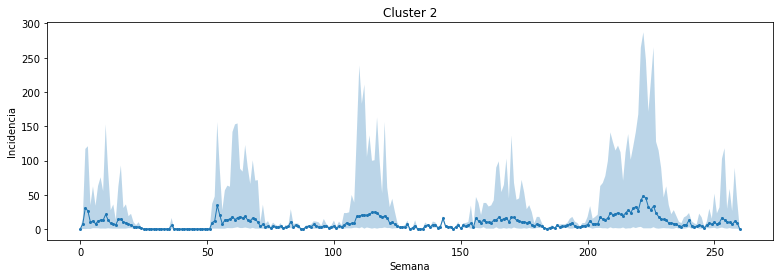

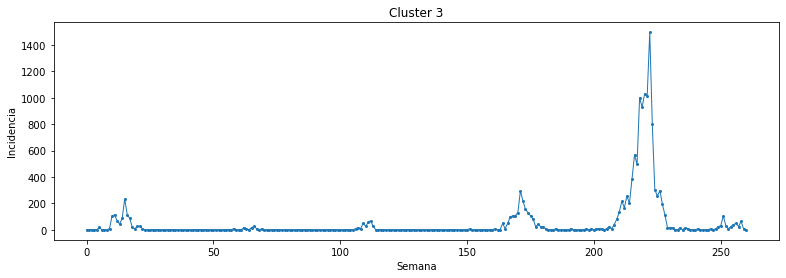

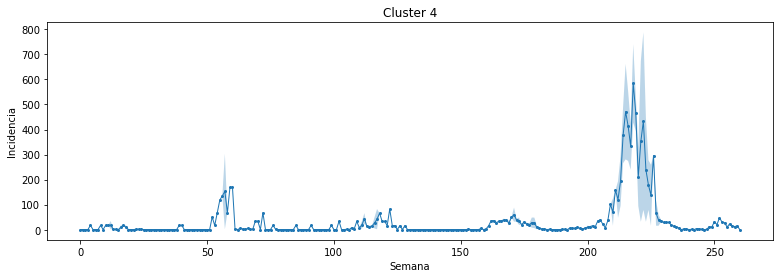

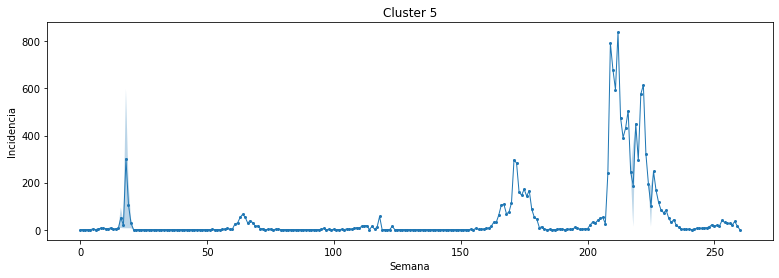

In [81]:
import random

for i in list(range(5)):
    aux = clustersFB[clustersFB['Cluster KM']== i].Distrito.values
    aux2 = df[df['Distrito'].isin(aux.tolist())]
    minimo= []
    maximo = []
    media = []
    for j in list(range(1,262)):
        aux3 = aux2[aux2['semana']==j].incidencia.values
        if (len(aux3)>0):
            minimo.append(min(aux3))
            maximo.append(max(aux3))
            media.append(sum(aux3)/len(aux3))
        else:
            minimo.append(-1)
            maximo.append(1)
            media.append(0.5)
    fig, ax = plt.subplots(figsize=(13, 4))
    #ax.plot(list(range(len(minimo))), minimo,'-')
    #ax.plot(list(range(len(maximo))), maximo,'-')
    ax.fill_between(list(range(len(minimo))), minimo, maximo, alpha=0.3)
    ax.plot(list(range(len(media))), media, lw=1, marker='o', ms=2)
    
    #ax.plot(fechas, media, lw=1, marker='o', ms=2)
    #ax.legend()
    plt.title('Cluster '+str(i+1))
    plt.xlabel('Semana')
    plt.ylabel('Incidencia')
    plt.savefig(my_path_py+"\\Pictures\\Promedio"+str(i))
plt.show()

# INCIDENCIA UNA MUESTRA POR CLUSTER 12-13

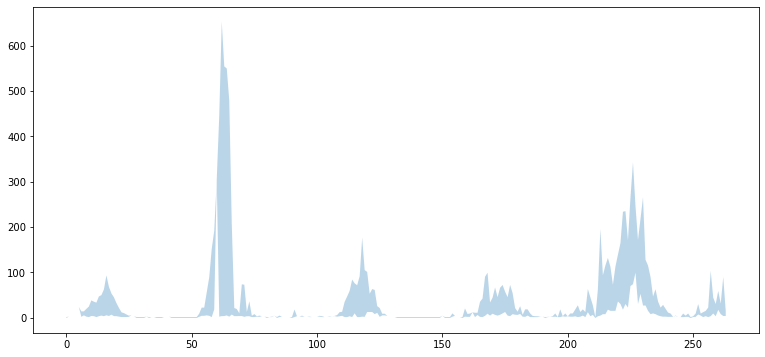

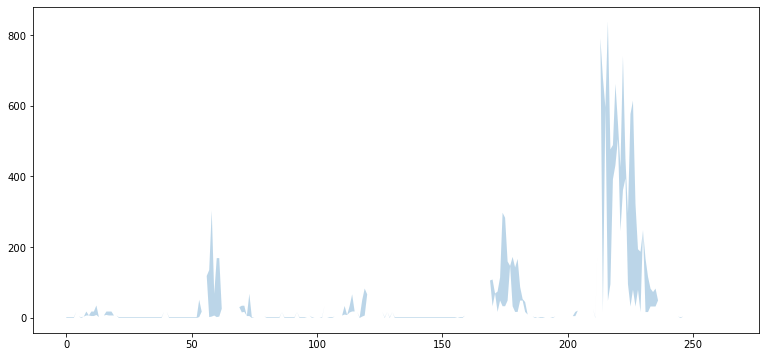

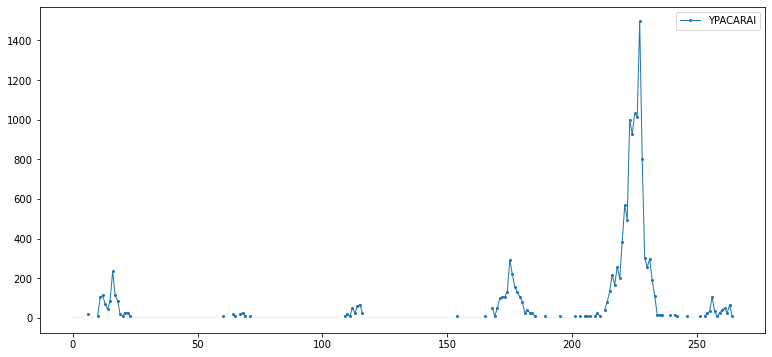

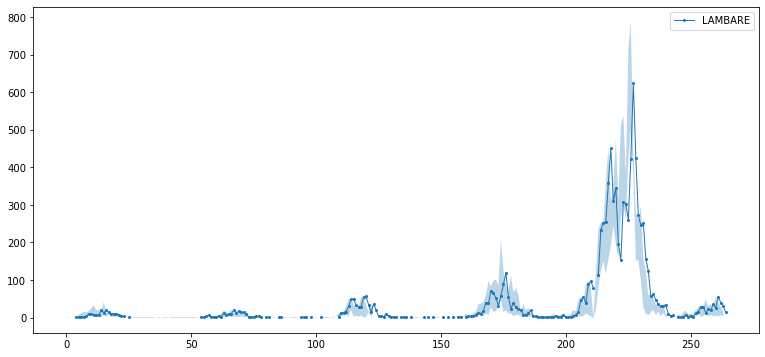

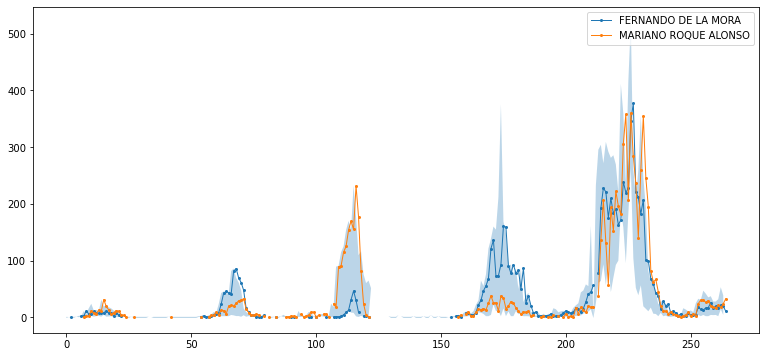

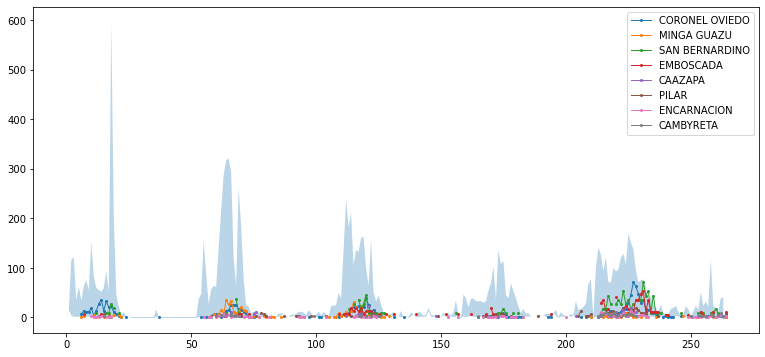

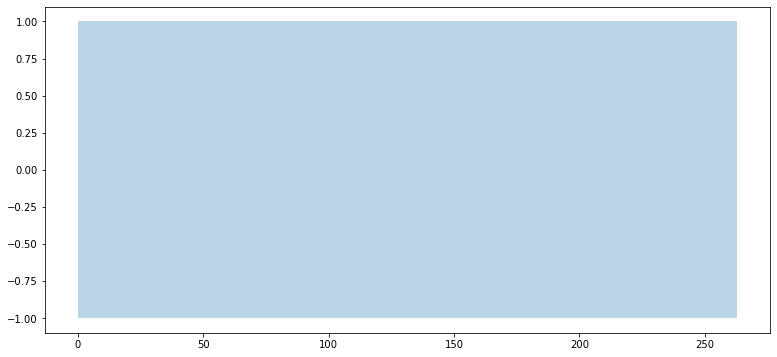

In [20]:
for i in list(range(7)):
    aux = clustersFBP2[clustersFBP2['Cluster KM']== i].Distrito.values
    aux2 = df[df['Distrito'].isin(aux.tolist())]
    minimo= []
    maximo = []
    for j in list(range(1,265)):
        aux3 = aux2[aux2['semana']==j].incidencia.values
        if (len(aux3)>0):
            minimo.append(min(aux3))
            maximo.append(max(aux3))
        else:
            minimo.append(-1)
            maximo.append(1)
    fig, ax = plt.subplots(figsize=(13, 6))
    #ax.plot(list(range(len(minimo))), minimo,'-')
    #ax.plot(list(range(len(maximo))), maximo,'-')
    ax.fill_between(list(range(len(minimo))), minimo, maximo, alpha=0.3)
    for d in muestras_alta:
        if (clustersFBP2[clustersFBP2['Distrito']== d]['Cluster KM'].values[0] == i):
            aux = df[df['Distrito']== d]
            aux = pd.merge(semanas_df, aux, how="left", on=['semana'])
            #aux['incidencia'] = aux['incidencia'].replace(np.nan, 0)
            y = aux['semana'].values
            x = aux['incidencia'].values
            ax.plot(y, x, label = d, lw=1, marker='o', ms=2)
            ax.legend()
            
    for d in muestras_media:
        if (clustersFBP2[clustersFBP2['Distrito']== d]['Cluster KM'].values[0] == i):
            aux = df[df['Distrito']== d]
            aux = pd.merge(semanas_df, aux, how="left", on=['semana'])
            #aux['incidencia'] = aux['incidencia'].replace(np.nan, 0)
            y = aux['semana'].values
            x = aux['incidencia'].values
            ax.plot(y, x, label = d, lw=1, marker='o', ms=2)
            ax.legend()
            
    for d in muestras_baja:
        if (clustersFBP2[clustersFBP2['Distrito']== d]['Cluster KM'].values[0] == i):
            aux = df[df['Distrito']== d]
            aux = pd.merge(semanas_df, aux, how="left", on=['semana'])
            #aux['incidencia'] = aux['incidencia'].replace(np.nan, 0)
            y = aux['semana'].values
            x = aux['incidencia'].values
            ax.plot(y, x, label = d, lw=1, marker='o', ms=2)
            ax.legend()
plt.show()

In [100]:
df_incidencianivel = pd.DataFrame()
lista_grupin = []
for d in listaDistrito:
    if incidencia_alta_lista.count(d)>0:
        lista_grupin.append(1)
    if incidencia_media_lista.count(d)> 0:
        lista_grupin.append(2)
    if incidencia_baja_lista.count(d)> 0:
        lista_grupin.append(3)
len(lista_grupin)

200

In [101]:
grupos_incidencia1 = pd.DataFrame()
grupos_incidencia1['Distrito'] = listaDistrito
grupos_incidencia1['Grupo Incidencia'] = lista_grupin

In [104]:
grupos_incidencia1.to_csv('Grupos_Incidencia.csv', index=False)